# Diabetes Prediction Using ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from warnings import filterwarnings
filterwarnings('ignore')

### Importing the dataset

In [2]:
df=pd.read_csv(r"C:\Users\Soundarya A I\Downloads\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Summary

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Diabetic people tend to have more Glucose level and BP level, and people with more age are susceptible to diabetes

In [64]:
df['Outcome'].value_counts(normalize=True)*100

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

Non-Diabetic ==> 0

Diabetic ==> 1

### Checking for null values

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Checking for duplicates

In [10]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### Data visualization

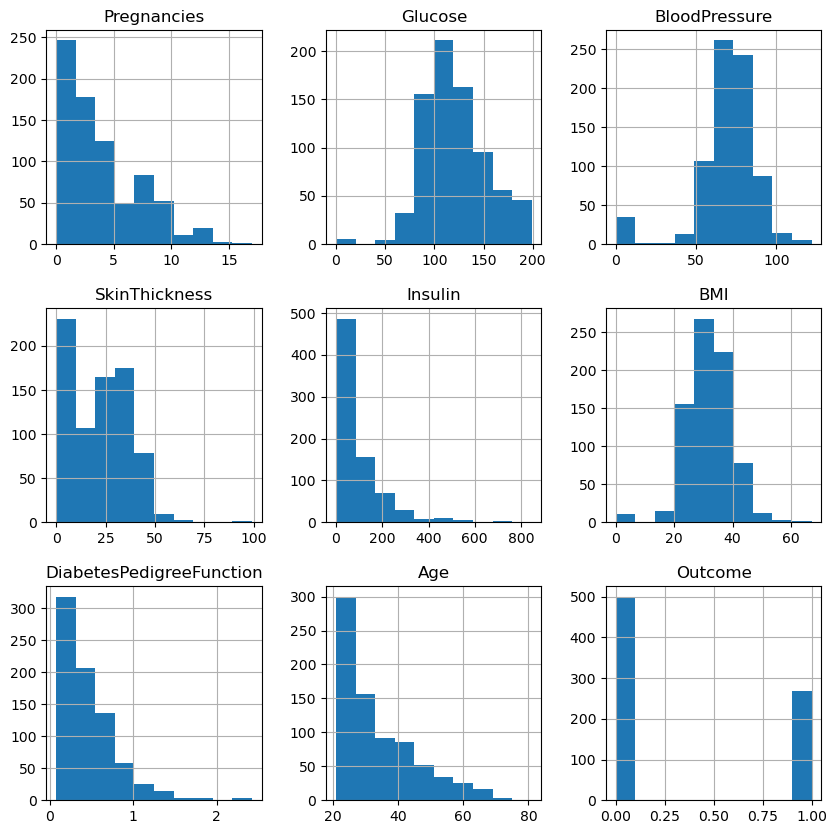

In [11]:
# Histogram of each feature
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: xlabel='Outcome', ylabel='Density'>

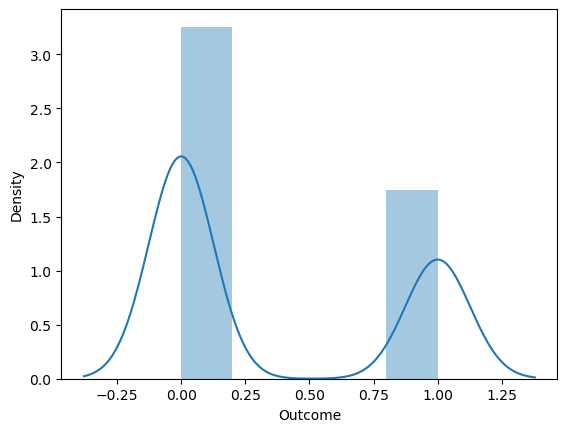

In [12]:
sns.distplot(df.Outcome)

Featuer Name = Pregnancies


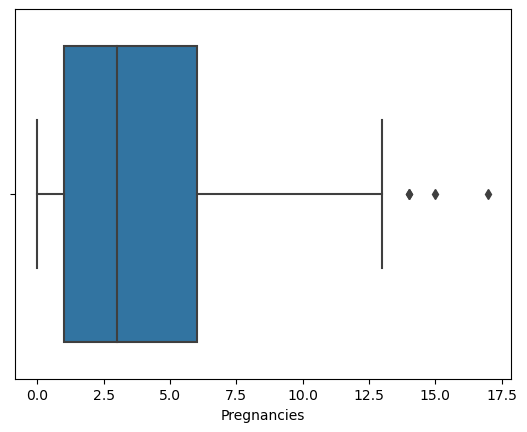

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

Featuer Name = Glucose


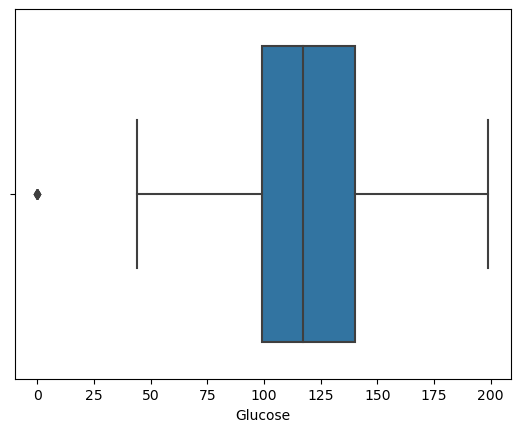

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

Featuer Name = BloodPressure


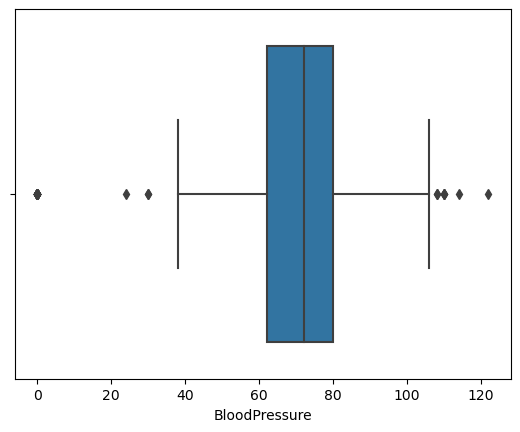

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Featuer Name = SkinThickness


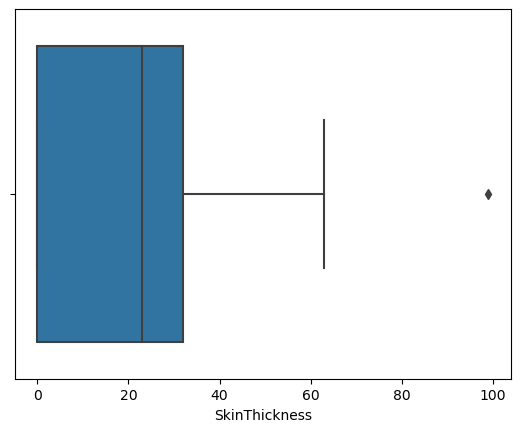

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

Featuer Name = Insulin


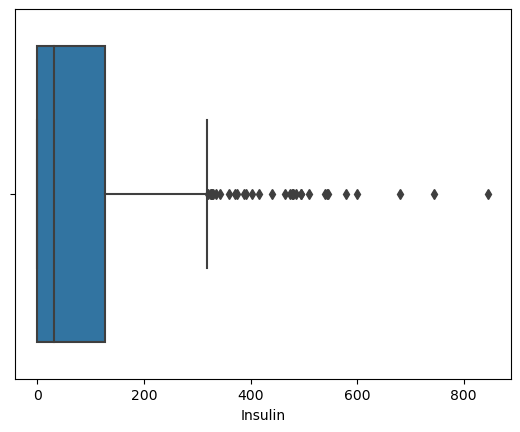

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

Featuer Name = BMI


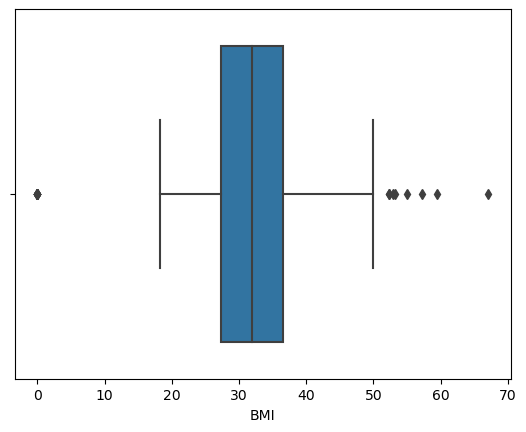

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

Featuer Name = DiabetesPedigreeFunction


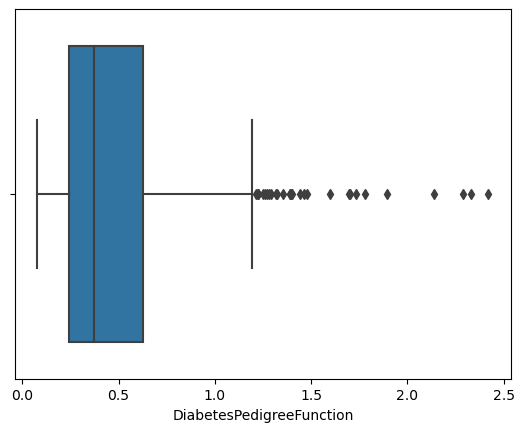

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

Featuer Name = Age


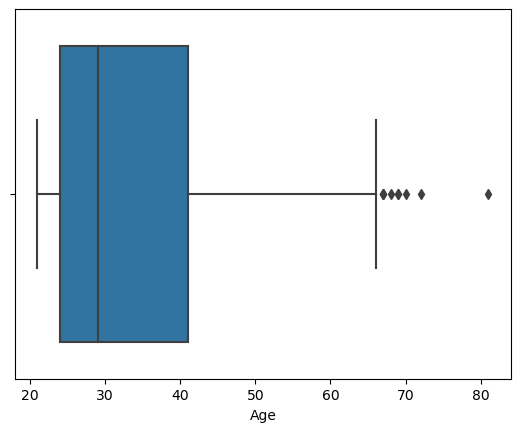

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

Featuer Name = Outcome


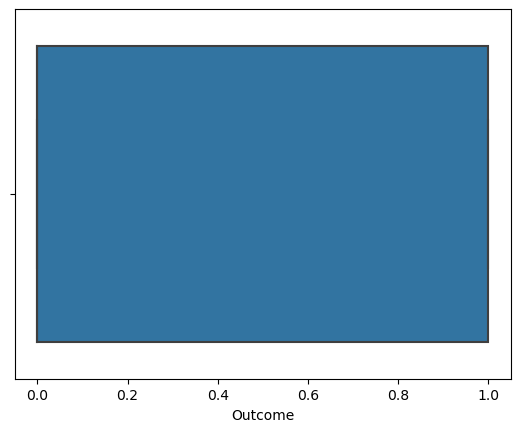

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [13]:
num_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

for i in num_cols:
    print(f'Featuer Name = {i}')
    sns.boxplot(x = df[i])
    plt.show()
    display(df[i].describe())

In [14]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


### Seperating dependent and independent variable

In [15]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [16]:
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


### Scaling to get the data in same range

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()

In [19]:
a = sc.fit_transform(X)
a[0]

array([ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
        0.20401277,  0.46849198,  1.4259954 ])

In [20]:
print(a)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [21]:
X=a
y=df['Outcome']

In [22]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [23]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state =1)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (537, 8) (231, 8)


In [27]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

In [28]:
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
X_test

array([[ 0.93691372,  0.47275805,  0.25303625, ..., -0.76057349,
         0.52889435,  1.51108316],
       [-0.84488505,  0.94221523, -0.47073225, ..., -0.74788157,
        -0.88452119, -0.95646168],
       [ 0.63994726, -0.37226487, -0.47073225, ..., -0.88749274,
        -0.80297799, -0.53102292],
       ...,
       [-0.84488505, -0.93561349, -0.78091875, ..., -0.86210889,
        -0.71841466, -0.87137393],
       [ 1.82781311,  1.4742667 ,  0.25303625, ...,  0.76245745,
         0.1966813 ,  0.06459135],
       [ 1.53084665, -0.27837344,  0.66661825, ...,  0.28016432,
        -0.63989158,  0.23476686]])

In [30]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [31]:
model.predict_proba(X_train)

array([[0.2503208 , 0.7496792 ],
       [0.84036274, 0.15963726],
       [0.88891461, 0.11108539],
       ...,
       [0.23608284, 0.76391716],
       [0.15241328, 0.84758672],
       [0.65929048, 0.34070952]])

In [32]:
pd.DataFrame(model.predict_proba(X_train))

,0,1
0,0.250321,0.749679
1,0.840363,0.159637
2,0.888915,0.111085
3,0.748901,0.251099
4,0.805386,0.194614
...,...,...
532,0.455864,0.544136
533,0.112108,0.887892
534,0.236083,0.763917
535,0.152413,0.847587


In [33]:
model.predict_proba(X_test)

array([[0.57715509, 0.42284491],
       [0.69929125, 0.30070875],
       [0.85365176, 0.14634824],
       [0.94337736, 0.05662264],
       [0.78823685, 0.21176315],
       [0.72476706, 0.27523294],
       [0.64415671, 0.35584329],
       [0.89499807, 0.10500193],
       [0.8352564 , 0.1647436 ],
       [0.79046588, 0.20953412],
       [0.57162128, 0.42837872],
       [0.92161209, 0.07838791],
       [0.0187614 , 0.9812386 ],
       [0.27622255, 0.72377745],
       [0.9722775 , 0.0277225 ],
       [0.28868007, 0.71131993],
       [0.76201147, 0.23798853],
       [0.69562579, 0.30437421],
       [0.8710687 , 0.1289313 ],
       [0.84093853, 0.15906147],
       [0.60865717, 0.39134283],
       [0.85973489, 0.14026511],
       [0.05010897, 0.94989103],
       [0.74047562, 0.25952438],
       [0.92550185, 0.07449815],
       [0.59657238, 0.40342762],
       [0.79765821, 0.20234179],
       [0.27636374, 0.72363626],
       [0.91483796, 0.08516204],
       [0.53517238, 0.46482762],
       [0.

In [34]:
pd.DataFrame(model.predict_proba(X_test))

,0,1
0,0.577155,0.422845
1,0.699291,0.300709
2,0.853652,0.146348
3,0.943377,0.056623
4,0.788237,0.211763
...,...,...
226,0.881361,0.118639
227,0.886512,0.113488
228,0.945928,0.054072
229,0.133968,0.866032


In [35]:
y_train_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [36]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [37]:
model.score(X_test,y_test)

0.7835497835497836

In [38]:
model.score(X_test,y_test_pred)

1.0

In [39]:
predicted=y_test_pred

In [40]:
compare=pd.DataFrame()

In [41]:
compare['predicted']=predicted

In [43]:
compare['Outcome']= y_test.reset_index(drop=True)

In [44]:
compare['Outcome']= y_test

In [45]:
compare

,predicted,Outcome
0,0,1.0
1,0,NaN
2,0,NaN
3,0,0.0
4,0,NaN
...,...,...
226,0,NaN
227,0,NaN
228,0,NaN
229,1,NaN


In [46]:
pred=y_train_pred

In [47]:
result=pd.DataFrame()

In [48]:
result['pred']=pred

In [49]:
result['actual']=y_train_pred

In [50]:
result

,pred,actual
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
532,1,1
533,1,1
534,1,1
535,1,1


In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [58]:
cm=confusion_matrix(y_test,y_test_pred)
cm

array([[132,  14],
       [ 36,  49]], dtype=int64)

In [59]:
cm_train = confusion_matrix(y_train,y_train_pred)
cm_train

array([[313,  41],
       [ 80, 103]], dtype=int64)

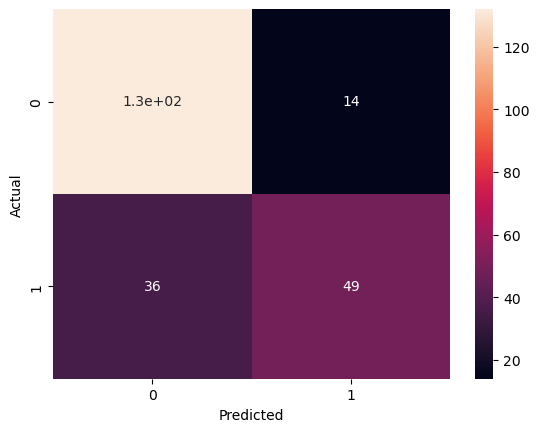

In [60]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

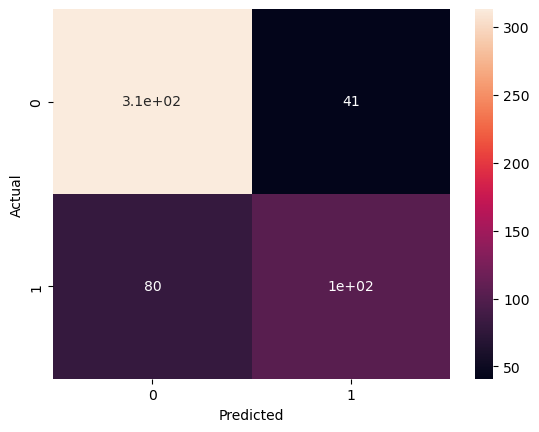

In [61]:
import seaborn as sns
sns.heatmap(cm_train,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [62]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [63]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       354
           1       0.72      0.56      0.63       183

    accuracy                           0.77       537
   macro avg       0.76      0.72      0.73       537
weighted avg       0.77      0.77      0.77       537

